# "Clustering Universities: Analyzing Patterns and Insights Using Unsupervised KMeans and PCA"

## Problem Statement:

### Project Overview:
The project aims to explore patterns and gain insights from a dataset containing information about various universities. The primary objectives include:

### 1. Cluster Analysis:
Apply the KMeans clustering algorithm to group universities based on selected features. Identify the optimal number of clusters using the Elbow Method.

### 2. Dimensionality Reduction:
Utilize Principal Component Analysis (PCA) to reduce the dimensionality of the data and visualize university clusters in a lower-dimensional space.

### 3. Insights Discovery:
Explore and interpret the clusters to uncover potential relationships and characteristics among universities. Understand the distribution of universities based on the chosen features.

## Project Components:

### 1. Cluster Analysis:
   - **Algorithm:** KMeans Clustering
   - **Methodology:** Utilize the Elbow Method to determine the optimal number of clusters.
   - **Implementation:** Apply KMeans to group universities based on selected features.

### 2. Dimensionality Reduction:
   - **Technique:** Principal Component Analysis (PCA)
   - **Implementation:** Use PCA to reduce the dimensionality of the data, enabling insightful visualizations.

### 3. Insights Discovery:
   - **Exploration:** Investigate the identified clusters to understand patterns and potential relationships.
   - **Interpretation:** Analyze the distribution of universities within each cluster baof higher education or related fields.
atures.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_excel("University_clustering.xlsx")
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradeRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [3]:
# Display the shape of the dataset
df_shape = df.shape
print(f"Dataset Shape: {df_shape}")

Dataset Shape: (25, 8)


In [4]:
# Display information about the dataset
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Univ       25 non-null     object
 1   State      25 non-null     object
 2   SAT        25 non-null     int64 
 3   Top10      25 non-null     int64 
 4   Accept     25 non-null     int64 
 5   SFRatio    25 non-null     int64 
 6   Expenses   25 non-null     int64 
 7   GradeRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB
None


In [5]:
# Selecting Features
# Drop non-numeric columns ("Univ" and "State") for clustering
X = df.drop(["Univ", "State"], axis=1)

-------

#### Scaling Data

In [6]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)  # Convert 2D numpy array to a DataFrame
X_scaled_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradeRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


--------

#### Elbow Method

In [7]:
# Selecting the best number of clusters using the elbow method
wcss = []
clusters = list(range(1, 9))
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

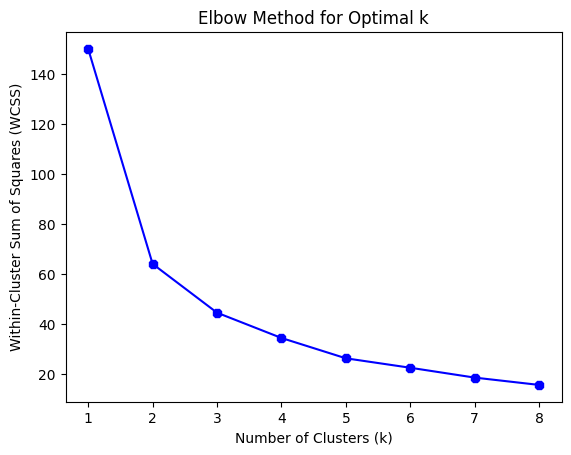

In [8]:
# Plotting the Elbow Method
plt.plot(clusters, wcss, color='b', marker="8")
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

---------

#### K-Means

In [9]:
# Applying KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [10]:
# displaying clustered data
print(df[["Univ","Cluster"]])

            Univ  Cluster
0          Brown        1
1        CalTech        2
2            CMU        1
3       Columbia        1
4        Cornell        1
5      Dartmouth        2
6           Duke        2
7     GeorgeTown        1
8        Harvard        2
9   JhonsHopkins        2
10           MIT        2
11  Northwestern        1
12     NotreDame        1
13     PennState        0
14      Priceton        2
15       Purdue         0
16      Stanford        2
17      TexasA&M        0
18    UCBerkeley        1
19      UChicago        1
20     UMichigan        1
21         UPenn        1
22           UVA        1
23    UWisconsin        0
24          Yale        2


In [11]:
# Getting cluster labels
labels = kmeans.labels_
labels

array([1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 2])

-------

#### Visualizing Clusters in 2D

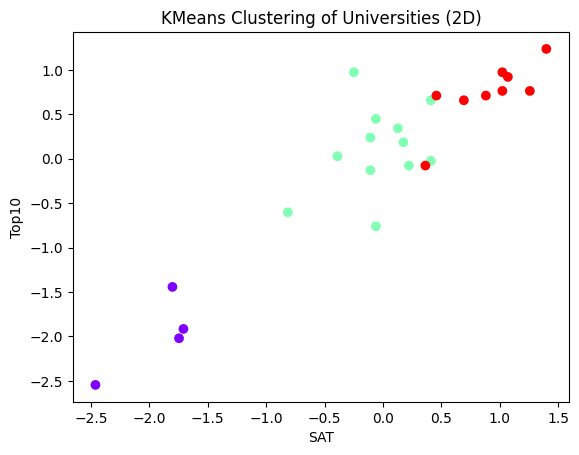

In [12]:
# 2D plot of the clusters
plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 1], c=df['Cluster'], cmap='rainbow')
plt.xlabel('SAT')
plt.ylabel('Top10')
plt.title('KMeans Clustering of Universities (2D)')
plt.show()

-------

#### PCA (Principle Component Analysis)

In [13]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=3, random_state=1)
components = pca.fit_transform(X_scaled)

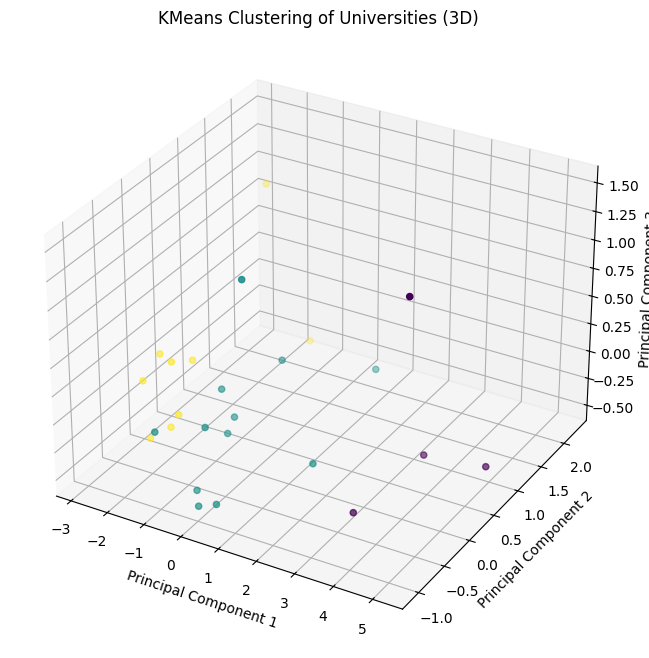

In [14]:
# 3D plot of the clusters
fig = plt.figure(figsize=(8, 8))
ax=plt.axes(projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=df['Cluster'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('KMeans Clustering of Universities (3D)')
plt.show()